# Project Notebook v2

# Notes
    * Need to figure out how to rename empty cells for parents
    * Need to combine disc buy and digital buy into just total buy for numbers and percents
    * Need to figure out how to split a groupby over more than one line
    * Need to figure out how to use compound logic/conditions in a groupby

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import linear_model

In [2]:
# loads in csv
dtt = pd.read_csv("Data\DTT Final Data w labels.csv",index_col=0)
dtt.head()

Gender  Age Age_Breaks        GenderAge    Region2   Race  \
respid                                                              
11752   Female   12   12 to 17  Female 12 to 17      South  White   
11944   Female   12   12 to 17  Female 12 to 17  Northeast  White   
12136   Female   12   12 to 17  Female 12 to 17       West  White   
12676   Female   12   12 to 17  Female 12 to 17  Northeast  White   
12802   Female   12   12 to 17  Female 12 to 17      South  White   

       Language_Dominance Parent        HH_Income        Employment  \
respid                                                                
11752                         No  3 - $30 to $39K  4 - Not employed   
11944                         No  4 - $40 to $59K     2 - Part time   
12136                         No  4 - $40 to $59K     1 - Full time   
12676                         No  6 - $75 to $99K     2 - Part time   
12802                         No  6 - $75 to $99K     2 - Part time   

                ...          Rented_Digital_iVOD Rented_Digital_sVOD  \
respid          ...                                                    
11752           ...                            0                  12   
11944           ...                            2                  10   
12136           ...                            5                   5   
12676           ...                            1                   1   
12802           ...                            1                   1   

        Rented_Digital_cVOD  cqhidGroup  filter_$  ZTotal_Paid_HE_Movies  \
respid                                                                     
11752                     2     Gen-Pop  Selected               0.297806   
11944                     0     Gen-Pop  Selected              -0.237831   
12136                     5     Gen-Pop  Selected               1.698704   
12676                     1     Gen-Pop  Selected              -0.402643   
12802                     2     Gen-Pop  Selected              -0.237831   

        Buy_Disc_Percent  Buy_Digital_Percent  Rent_Disc_Percent  \
respid                                                             
11752           0.269231             0.000000           0.192308   
11944           0.076923             0.000000           0.000000   
12136           0.250000             0.083333           0.416667   
12676           0.222222             0.111111           0.333333   
12802           0.230769             0.153846           0.307692   

        Rent_Digital_Percent  
respid                        
11752               0.538462  
11944               0.923077  
12136               0.250000  
12676               0.333333  
12802               0.307692  

[5 rows x 29 columns]

In [3]:
#Calculates all rollups and adds as columns

#total movies bought on disc
dtt['Total Discs Bought'] = (dtt['Bought_Disc_BD'] + dtt['Bought_Disc_DVD'])

#total movies rented on disc
dtt['Total Discs Rented'] = (dtt['Rented_Disc_Kiosk'] + dtt['Rented_Disc_Mail'] + dtt['Rented_Disc_Store'])

#total movies rented on digital
dtt['Total Digital Rented'] = (dtt['Rented_Digital_cVOD'] + dtt['Rented_Digital_iVOD'] + dtt['Rented_Digital_sVOD'])

#total movies purchased
dtt['Total Bought'] = (dtt['Bought_Disc_BD'] + dtt['Bought_Disc_DVD'] + dtt['Bought_Digital'])

#total movies purchased as percent of total
dtt['Buy_percent'] = dtt['Total Bought'].astype(float) / dtt['Total_Paid_HE_Movies']

In [4]:
dtt.describe().T

count       mean        std        min        25%  \
Age                    1925.0  39.631169  15.969080  12.000000  26.000000   
Total_Paid_HE_Movies   1925.0  16.145455  16.526946   1.000000   5.000000   
Bought_Disc_DVD        1925.0   1.588052   2.914257   0.000000   0.000000   
Bought_Disc_BD         1925.0   1.284156   2.637839   0.000000   0.000000   
Bought_Digital         1925.0   0.723636   2.081871   0.000000   0.000000   
Rented_Disc_Store      1925.0   0.696104   2.313436   0.000000   0.000000   
Rented_Disc_Kiosk      1925.0   2.020260   4.263794   0.000000   0.000000   
Rented_Disc_Mail       1925.0   1.131948   4.504357   0.000000   0.000000   
Rented_Digital_iVOD    1925.0   0.717922   2.047491   0.000000   0.000000   
Rented_Digital_sVOD    1925.0   6.691429  10.804796   0.000000   0.000000   
Rented_Digital_cVOD    1925.0   1.291948   3.550492   0.000000   0.000000   
ZTotal_Paid_HE_Movies  1925.0  -0.108229   0.680958  -0.732266  -0.567454   
Buy_Disc_Percent       1925.0   0.239981   0.306352   0.000000   0.000000   
Buy_Digital_Percent    1925.0   0.041825   0.111739   0.000000   0.000000   
Rent_Disc_Percent      1925.0   0.234541   0.292798   0.000000   0.000000   
Rent_Digital_Percent   1925.0   0.483653   0.369288   0.000000   0.133333   
Total Discs Bought     1925.0   2.872208   4.604784   0.000000   0.000000   
Total Discs Rented     1925.0   3.848312   6.915127   0.000000   0.000000   
Total Digital Rented   1925.0   8.701299  11.978178   0.000000   1.000000   
Total Bought           1925.0   3.595844   5.596236   0.000000   0.000000   
Buy_percent            1925.0   0.281806   0.323495   0.000000   0.000000   

                             50%        75%        max  
Age                    39.000000  52.000000  74.000000  
Total_Paid_HE_Movies   10.000000  22.000000  91.000000  
Bought_Disc_DVD         1.000000   2.000000  30.000000  
Bought_Disc_BD          0.000000   2.000000  50.000000  
Bought_Digital          0.000000   1.000000  30.000000  
Rented_Disc_Store       0.000000   0.000000  50.000000  
Rented_Disc_Kiosk       0.000000   2.000000  50.000000  
Rented_Disc_Mail        0.000000   0.000000  70.000000  
Rented_Digital_iVOD     0.000000   1.000000  50.000000  
Rented_Digital_sVOD     3.000000  10.000000  80.000000  
Rented_Digital_cVOD     0.000000   1.000000  75.000000  
ZTotal_Paid_HE_Movies  -0.361440   0.132995   2.975994  
Buy_Disc_Percent        0.136364   0.333333   1.000000  
Buy_Digital_Percent     0.000000   0.014925   1.000000  
Rent_Disc_Percent       0.116279   0.375000   1.000000  
Rent_Digital_Percent    0.483871   0.833333   1.000000  
Total Discs Bought      1.000000   4.000000  55.000000  
Total Discs Rented      1.000000   5.000000  70.000000  
Total Digital Rented    5.000000  11.000000  90.000000  
Total Bought            2.000000   5.000000  60.000000  
Buy_percent             0.181818   0.416667   1.000000

### Consumption Distributions

Probably need to combine disc and digital purchase into just purchase

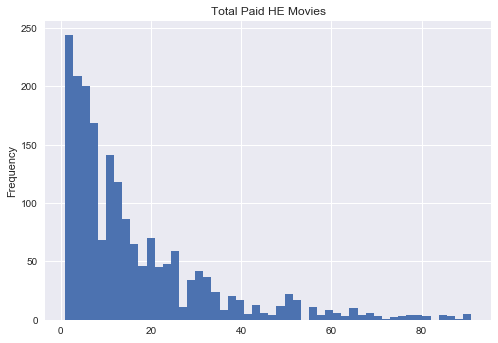

In [5]:
dtt.Total_Paid_HE_Movies.plot(kind='hist', bins = 50, title = 'Total Paid HE Movies')

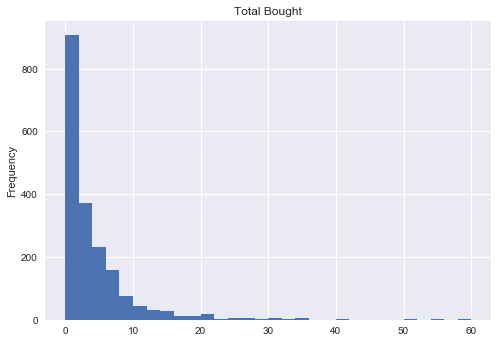

In [6]:
dtt['Total Bought'].plot(kind='hist', bins = 30, title = 'Total Bought')

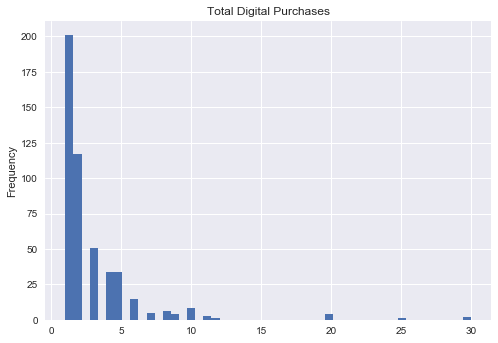

In [7]:
dtt['Bought_Digital'][dtt.Bought_Digital > 0].plot(kind='hist', bins = 50, title = 'Total Digital Purchases')

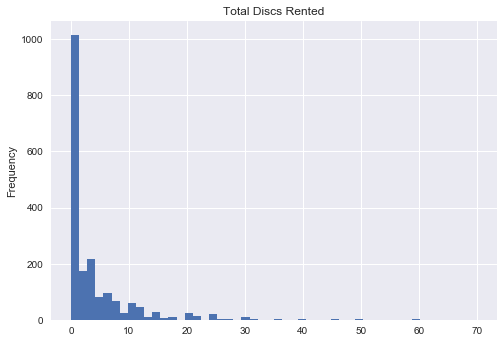

In [8]:
dtt['Total Discs Rented'].plot(kind='hist', bins = 50, title = 'Total Discs Rented')

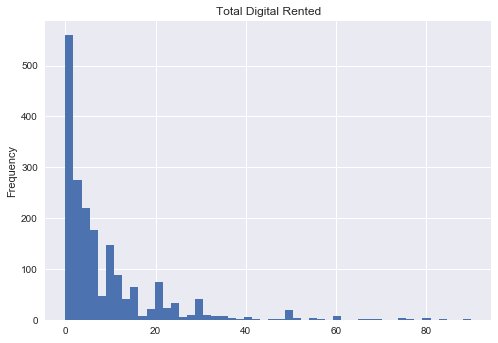

In [9]:
dtt['Total Digital Rented'].plot(kind='hist', bins = 50, title = 'Total Digital Rented')

# Getting Dummies

## Gender

In [10]:
dGender = pd.get_dummies(dtt.Gender, prefix='Gender', drop_first = True)
dGender.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1925 entries, 11752 to 4712
Data columns (total 1 columns):
Gender_Male    1925 non-null uint8
dtypes: uint8(1)
memory usage: 96.9 KB


## Age_Breaks

In [11]:
dAge_Breaks = pd.get_dummies(dtt.Age_Breaks, prefix = 'Age', drop_first= True)
dAge_Breaks.info(0)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1925 entries, 11752 to 4712
Data columns (total 6 columns):
Age_18 to 24    1925 non-null uint8
Age_25 to 34    1925 non-null uint8
Age_35 to 44    1925 non-null uint8
Age_45 to 54    1925 non-null uint8
Age_55 to 64    1925 non-null uint8
Age_65 to 74    1925 non-null uint8
dtypes: uint8(6)
memory usage: 106.3 KB


## Race

In [12]:
dRace = pd.get_dummies(dtt.Race, prefix = 'Race',drop_first=True)
dRace.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1925 entries, 11752 to 4712
Data columns (total 4 columns):
Race_Black       1925 non-null uint8
Race_Hispanic    1925 non-null uint8
Race_Other       1925 non-null uint8
Race_White       1925 non-null uint8
dtypes: uint8(4)
memory usage: 102.6 KB


## Region

In [13]:
dRegion = pd.get_dummies(dtt.Region2,prefix='Region', drop_first=True)
dRegion.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1925 entries, 11752 to 4712
Data columns (total 3 columns):
Region_Northeast    1925 non-null uint8
Region_South        1925 non-null uint8
Region_West         1925 non-null uint8
dtypes: uint8(3)
memory usage: 100.7 KB


## Parent

In [14]:
dParent = pd.get_dummies(dtt.Parent,prefix='Parent',drop_first=True)
dParent.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1925 entries, 11752 to 4712
Data columns (total 1 columns):
Parent_Yes    1925 non-null uint8
dtypes: uint8(1)
memory usage: 96.9 KB


## Income

In [15]:
dHH_Income = pd.get_dummies(dtt.HH_Income,prefix='Income',drop_first=True)
dHH_Income.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1925 entries, 11752 to 4712
Data columns (total 9 columns):
Income_2 - $20 to $29K         1925 non-null uint8
Income_3 - $30 to $39K         1925 non-null uint8
Income_4 - $40 to $59K         1925 non-null uint8
Income_5 - $60 to $74K         1925 non-null uint8
Income_6 - $75 to $99K         1925 non-null uint8
Income_7 - $100 to $149K       1925 non-null uint8
Income_8 - $150 to $199K       1925 non-null uint8
Income_9 - $200K+              1925 non-null uint8
Income_Prefer not to answer    1925 non-null uint8
dtypes: uint8(9)
memory usage: 112.0 KB


## Employment

In [16]:
dEmployment = pd.get_dummies(dtt.Employment,prefix='Employment', drop_first=True)
dEmployment.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1925 entries, 11752 to 4712
Data columns (total 3 columns):
Employment_2 - Part time       1925 non-null uint8
Employment_3 - Retired         1925 non-null uint8
Employment_4 - Not employed    1925 non-null uint8
dtypes: uint8(3)
memory usage: 100.7 KB


## Education

In [17]:
dEducation = pd.get_dummies(dtt.Education,prefix='Education', drop_first=True)
dEducation.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1925 entries, 11752 to 4712
Data columns (total 6 columns):
Education_2 - HS Grad                 1925 non-null uint8
Education_3 - Some coll               1925 non-null uint8
Education_4 - Coll Grad               1925 non-null uint8
Education_5 - Some Post-grad          1925 non-null uint8
Education_6 - Post-grad               1925 non-null uint8
Education_7 - Prefer not to answer    1925 non-null uint8
dtypes: uint8(6)
memory usage: 106.3 KB


## Marital Status

In [18]:
dMarital_Status = pd.get_dummies(dtt.Marital_Status,prefix='Marital_Status', drop_first=True)
dMarital_Status.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1925 entries, 11752 to 4712
Data columns (total 3 columns):
Marital_Status_Married                 1925 non-null uint8
Marital_Status_Prefer not to answer    1925 non-null uint8
Marital_Status_Single                  1925 non-null uint8
dtypes: uint8(3)
memory usage: 100.7 KB


## GenderAge

In [19]:
dGenderAge = pd.get_dummies(dtt.GenderAge,prefix='GenderAge', drop_first=True)
dGenderAge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1925 entries, 11752 to 4712
Data columns (total 13 columns):
GenderAge_Female 18 to 24    1925 non-null uint8
GenderAge_Female 25 to 34    1925 non-null uint8
GenderAge_Female 35 to 44    1925 non-null uint8
GenderAge_Female 45 to 54    1925 non-null uint8
GenderAge_Female 55 to 64    1925 non-null uint8
GenderAge_Female 65 to 74    1925 non-null uint8
GenderAge_Male 12 to 17      1925 non-null uint8
GenderAge_Male 18 to 24      1925 non-null uint8
GenderAge_Male 25 to 34      1925 non-null uint8
GenderAge_Male 35 to 44      1925 non-null uint8
GenderAge_Male 45 to 54      1925 non-null uint8
GenderAge_Male 55 to 64      1925 non-null uint8
GenderAge_Male 65 to 74      1925 non-null uint8
dtypes: uint8(13)
memory usage: 119.5 KB


## Model Building

In [20]:
from scipy import stats
import statsmodels.api as sm

from sklearn import feature_selection, linear_model

C:\Users\anne1\Anaconda2\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [21]:
def get_linear_model_metrics(X, y, algo):
    # get the pvalue of X given y. Ignore f-stat for now.
    pvals = feature_selection.f_regression(X, y)[1]
    # start with an empty linear regression object
    # .fit() runs the linear regression function on X and y
    algo.fit(X,y)
    residuals = (y-algo.predict(X)).values

    # print the necessary values
    print 'P Values:', pvals
    print 'Coefficients:', algo.coef_
    print 'y-intercept:', algo.intercept_
    print 'R-Squared:', algo.score(X,y)
    plt.figure()
    plt.hist(residuals, bins=np.ceil(np.sqrt(len(y))).astype(int))
    # keep the model
    return algo


### Creating Feature Sets

In [22]:
XGender = dtt[['Gender_Male']]

XAge_Breaks = dtt[['Age_18 to 24', 'Age_25 to 34', 'Age_35 to 44', 'Age_45 to 54', 'Age_55 to 64', 'Age_65 to 74']]

XAge = dtt[['Age']]

XGenderAge = dtt[['GenderAge_Female 18 to 24', 'GenderAge_Female 25 to 34', 'GenderAge_Female 35 to 44',
                  'GenderAge_Female 45 to 54', 'GenderAge_Female 55 to 64', 'GenderAge_Female 65 to 74', 
                  'GenderAge_Male 12 to 17', 'GenderAge_Male 18 to 24', 'GenderAge_Male 25 to 34', 
                  'GenderAge_Male 35 to 44', 'GenderAge_Male 45 to 54', 'GenderAge_Male 55 to 64', 
                  'GenderAge_Male 65 to 74']]
    
    
    
XRace = dtt[['Race_Black','Race_Hispanic','Race_Other','Race_White']]

XParent = dtt[['Parent_Yes']]

XRegion = dtt[['Region_Northeast', 'Region_South', 'Region_West']]


XIncome = dtt[['Income_2 - $20 to $29K', 'Income_3 - $30 to $39K',
               'Income_4 - $40 to $59K', 'Income_5 - $60 to $74K', 
               'Income_6 - $75 to $99K', 'Income_7 - $100 to $149K', 
               'Income_8 - $150 to $199K', 'Income_9 - $200K+', 'Income_Prefer not to answer']]

XEmpl = dtt[['Employment_2 - Part time', 
             'Employment_3 - Retired', 'Employment_4 - Not employed']]


XEdu = dtt[['Education_2 - HS Grad', 'Education_3 - Some coll', 
            'Education_4 - Coll Grad', 'Education_5 - Some Post-grad', 'Education_6 - Post-grad', 
            'Education_7 - Prefer not to answer']]


XMar = dtt[['Marital_Status_Married', 'Marital_Status_Single']]

XPercent = dtt[['Buy_percent', 'Rent_Disc_Percent', 'Rent_Digital_Percent']]

XMethod = dtt[['Total Bought', 'Total Discs Rented', 'Total Digital Rented']]

XAll = pd.concat([XGender, XAge_Breaks, XRace, XRegion, XParent],axis=1)

KeyError: "['Gender_Male'] not in index"

## Using SKLearn

In [ ]:
from sklearn import feature_selection, linear_model

from sklearn.model_selection import cross_val_score

## The  Model

In [ ]:
Buy_percent = dtt[['Buy_percent']]

Rent_Disc_Percent = dtt[['Rent_Disc_Percent']]

Rent_Digital_Percent = dtt[['Rent_Digital_Percent']]

In [ ]:
X = pd.concat([XGenderAge, Buy_percent, XParent, Rent_Digital_Percent, XEmpl, XRace, XMar], axis=1)

model = linear_model.LinearRegression()

get_linear_model_metrics(X,dtt['Total_Paid_HE_Movies'],model)

# Key Measures by Demographics

In [ ]:
Cons_Meas_wTot = ['Total_Paid_HE_Movies','Total Bought','Total Discs Rented',
                  'Total Digital Rented']

Cons_Meas_noTot = ['Total Bought','Total Discs Rented','Total Digital Rented']

### Consumption by Gender

In [ ]:
dtt.groupby(dtt.Gender)[Cons_Meas_wTot].mean()

In [ ]:
gby_gender = dtt.groupby(dtt.Gender)[Cons_Meas_noTot].mean()
gby_gender.plot(kind='bar',stacked=True,title = "Average Consumption by Gender")

In [ ]:
gby_gender = dtt.groupby(dtt.Gender)[Cons_Meas_noTot].mean()
gby_gender.plot(kind='bar',stacked=False,title = "Average Consumption by Gender")

### Consumption by Age Breaks

In [ ]:
dtt.groupby(dtt.Age_Breaks)[Cons_Meas_wTot].mean()

In [ ]:
gby_age = dtt.groupby(dtt.Age_Breaks)[Cons_Meas_noTot].mean()
gby_age.plot(kind = 'bar', stacked = True, title = 'Average Consumption by Age')

In [ ]:
gby_age = dtt.groupby(dtt.Age_Breaks)[Cons_Meas_noTot].mean()
gby_age.plot(kind = 'bar', stacked = False, title = 'Average Consumption by Age')

### Consumption by Race

In [ ]:
dtt.groupby(dtt.Race)[Cons_Meas_wTot].mean()

In [ ]:
gby_race = dtt.groupby(dtt.Race)[Cons_Meas_noTot].mean()
gby_race.plot(kind = 'bar', stacked = True, title = 'Average Consumption by Race')

In [ ]:
gby_race = dtt.groupby(dtt.Race)[Cons_Meas_noTot].mean()
gby_race.plot(kind = 'bar', stacked = False, title = 'Average Consumption by Race')

### Consumption by Employment Status

In [ ]:
dtt.groupby(dtt.Employment)[Cons_Meas_wTot].mean()

In [ ]:
gby_emply = dtt.groupby(dtt.Employment)[Cons_Meas_noTot].mean()
gby_emply.plot(kind = 'bar', stacked = True, title = 'Average Consumption by Employment')

In [ ]:
gby_emply = dtt.groupby(dtt.Employment)[Cons_Meas_noTot].mean()
gby_emply.plot(kind = 'bar', stacked = False, title = 'Average Consumption by Employment')

### Consumption by Education

In [ ]:
dtt.groupby(dtt.Education)[Cons_Meas_wTot].mean()

In [ ]:
gby_educ = dtt.groupby(dtt.Education)[Cons_Meas_noTot].mean()
gby_educ = gby_educ.drop(['7 - Prefer not to answer'])

gby_educ.plot(kind = 'bar', stacked = True, title = 'Average Consumption by Education')

In [ ]:
gby_educ = dtt.groupby(dtt.Education)[Cons_Meas_noTot].mean()
gby_educ = gby_educ.drop(['7 - Prefer not to answer'])
gby_educ.plot(kind = 'bar', stacked = False, title = 'Average Consumption by Education')

### Consumption by Marital Status

In [ ]:
dtt.groupby(dtt.Marital_Status[dtt.Marital_Status != 'Prefer not to answer'])[Cons_Meas_wTot].mean()

In [ ]:
dtt.groupby(dtt.Marital_Status[dtt.Marital_Status != 'Prefer not to answer'])[Cons_Meas_noTot].mean().plot(kind='bar',stacked = True)

In [ ]:
dtt.groupby(
    dtt.Marital_Status[dtt.Marital_Status != 'Prefer not to answer'])[Cons_Meas_noTot].mean().plot(kind='bar',
                                                                                                   stacked = False)

### Consumption by Parental status

In [ ]:
dtt.Parent.value_counts()

In [ ]:
dtt.Parent.unique()

In [ ]:
dtt.groupby(dtt.Parent [(dtt.Parent == "Yes") | (dtt.Parent == "No")])[Cons_Meas_wTot].mean()

In [ ]:
dtt.groupby(
    dtt.Parent[(dtt.Parent == 'Yes')|(dtt.Parent == 'No')])[Cons_Meas_noTot].mean().plot(kind='bar',
                                                                                         title = 'Consumption by Parental Status', 
                                                                                         stacked = True)

In [ ]:
dtt.groupby(
    dtt.Parent[(dtt.Parent == 'Yes')|(dtt.Parent == 'No')])[Cons_Meas_noTot].mean().plot(kind='bar',
                                                                                         title = 'Consumption by Parental Status', 
                                                                                         stacked = False)